> ref : https://www.kaggle.com/code/albatros1602/weight-estimation-of-seven-different-fish-species/notebook

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import seaborn as sns

from collections import Counter

In [2]:
data = pd.read_csv('../Dataset/fish_weight/Fish.csv')
print(plt.style.available)
plt.style.use('ggplot')


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [3]:
data.head()


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


![](https://fishionary.fisheries.org/wp-content/uploads/2014/04/scup_lengths.png)

![](https://www.researchgate.net/profile/Harrison_Charo-Karisa/publication/40123354/figure/fig6/AS:669473098977283@1536626233163/Body-measurements-taken-on-each-fish-total-length-TL-standard-length-SL-body-depth_W640.jpg)

In [4]:
data.columns = ['Species', 'Weight', 'SL', 'FL', 'TL', 'BD', 'BT']
data.head()

,Species,Weight,SL,FL,TL,BD,BT
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   SL       159 non-null    float64
 3   FL       159 non-null    float64
 4   TL       159 non-null    float64
 5   BD       159 non-null    float64
 6   BT       159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
print(str('Is there any NaN value in the dataset: '), data.isnull().values.any())

Is there any NaN value in the dataset:  False


###  통계치 확인

In [7]:
data.describe()

,Weight,SL,FL,TL,BD,BT
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [8]:
sp = data['Species'].value_counts()
sp = pd.DataFrame(sp)
sp.T

,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,56,35,20,17,14,11,6


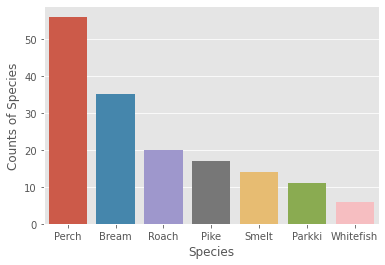

In [9]:
sns.barplot(x=sp.index, y=sp['Species']);
plt.xlabel('Species')
plt.ylabel('Counts of Species')
plt.show()

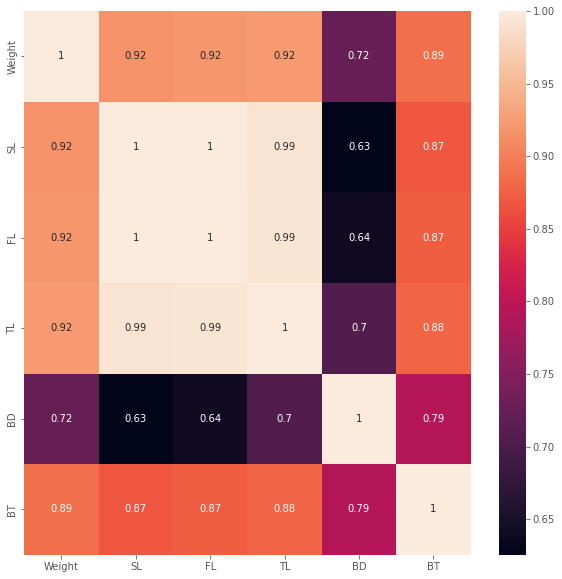

In [10]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data[["Weight", "SL", "FL", "TL", "BD", "BT",]].corr(), annot = True)
plt.show()

In [11]:
def corr(species):
    data1 = data[data['Species'] == species]
    fig, ax = plt.subplots(figsize=(5,5)) 
    sns.heatmap(data1[["Weight", "SL", "FL", "TL", "BD", "BT",]].corr(), annot = True)
    plt.title("Correlation heat map of {} ".format(species))
    plt.show()

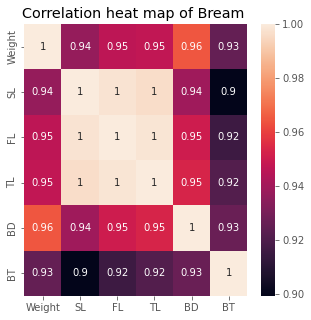

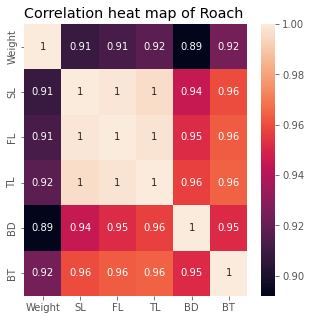

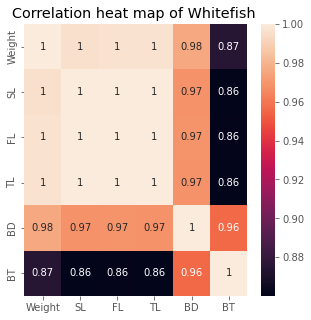

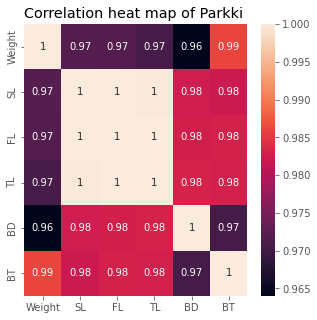

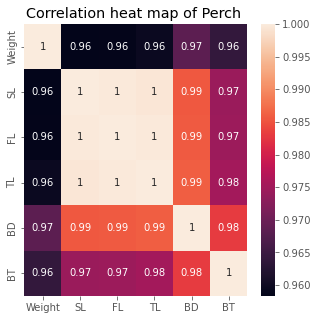

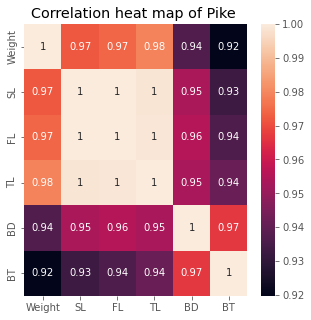

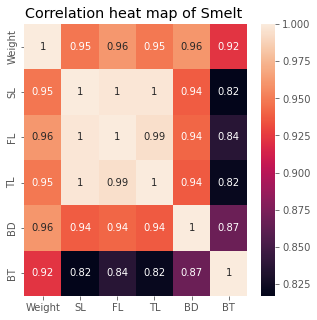

In [12]:
species_list = list(data['Species'].unique())
for s in species_list:
    corr(s)
    

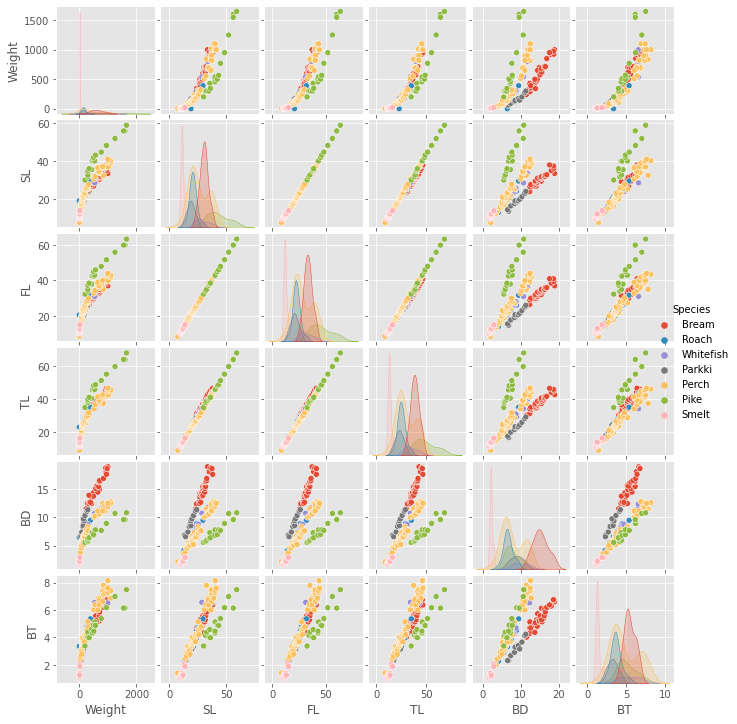

In [13]:
g = sns.pairplot(data, kind='scatter', hue='Species')
g.fig.set_size_inches(10,10)

### outlier 처리 

In [14]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [15]:
data.loc[detect_outliers(data,["Weight", "SL", "FL", "TL", "BD", "BT"])]

,Species,Weight,SL,FL,TL,BD,BT
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [16]:
df_pike = data[data['Species'] == 'Pike']
df_pike.loc[detect_outliers(df_pike,["Weight", "SL", "FL", "TL", "BD", "BT"])]

,Species,Weight,SL,FL,TL,BD,BT


In [17]:
species_list = list(data['Species'].unique())
print(species_list)

['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt']


In [18]:
df_s = data[data['Species'] == 'Bream']
df_s.loc[detect_outliers(df_s,["Weight", "SL", "FL", "TL", "BD", "BT"])]

,Species,Weight,SL,FL,TL,BD,BT


In [19]:
df_s = data[data['Species'] == 'Roach']
df_s.loc[detect_outliers(df_s,["Weight", "SL", "FL", "TL", "BD", "BT"])]

,Species,Weight,SL,FL,TL,BD,BT
54,Roach,390.0,29.5,31.7,35.0,9.4850,5.355
35,Roach,40.0,12.9,14.1,16.2,4.1472,2.268


In [20]:
df_s = data[data['Species'] == 'Whitefish']
df_s.loc[detect_outliers(df_s,["Weight", "SL", "FL", "TL", "BD", "BT"])]

,Species,Weight,SL,FL,TL,BD,BT


In [21]:
df_s = data[data['Species'] == 'Parkki']
df_s.loc[detect_outliers(df_s,["Weight", "SL", "FL", "TL", "BD", "BT"])]

,Species,Weight,SL,FL,TL,BD,BT


In [22]:
df_s = data[data['Species'] == 'Perch']
df_s.loc[detect_outliers(df_s,["Weight", "SL", "FL", "TL", "BD", "BT"])]

,Species,Weight,SL,FL,TL,BD,BT


In [23]:
df_s = data[data['Species'] == 'Smelt']
df_s.loc[detect_outliers(df_s,["Weight", "SL", "FL", "TL", "BD", "BT"])]

,Species,Weight,SL,FL,TL,BD,BT
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [24]:
data1 = data.drop([35, 54, 157,158])
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 156
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  155 non-null    object 
 1   Weight   155 non-null    float64
 2   SL       155 non-null    float64
 3   FL       155 non-null    float64
 4   TL       155 non-null    float64
 5   BD       155 non-null    float64
 6   BT       155 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.7+ KB


In [25]:
data1.columns[data1.isnull().any()]

Index([], dtype='object')

In [26]:
data1.head()

,Species,Weight,SL,FL,TL,BD,BT
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### regression 

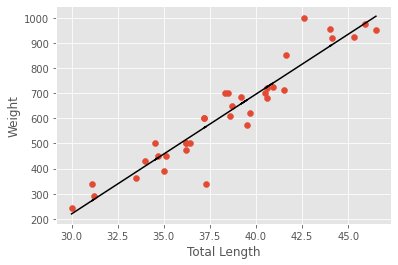

In [27]:
df_bream = data1[data1['Species'] == 'Bream']

from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

x = df_bream.TL.values.reshape(-1,1)
y = df_bream.Weight.values.reshape(-1,1)

linear_reg.fit(x,y)
y_head = linear_reg.predict(x)

plt.scatter(df_bream.TL,df_bream.Weight)
plt.plot(x,y_head,color= "black")
plt.xlabel("Total Length")
plt.ylabel("Weight")
plt.show()

In [28]:
print('The weight of a 36 cm Bream is: ', linear_reg.predict([[36]]), 'grams')

The weight of a 36 cm Bream is:  [[505.6333112]] grams


In [29]:
y = df_bream['Weight'] # Dependant Var
X = df_bream.iloc[:,[4,5]]

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [31]:
print('Samples in the test and train datasets are:')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

Samples in the test and train datasets are:
X_train:  (28, 2)
y_train:  (28,)
X_test:  (7, 2)
y_test:  (7,)


In [32]:
ML_reg = LinearRegression()
ML_reg.fit(X_train, y_train)

LinearRegression()

In [33]:
print('y = ' + str('%.2f' % ML_reg.intercept_) + ' + ' + str('%.2f' % ML_reg.coef_[0]) + '*X1 ' + ' + ' + str('%.2f' % ML_reg.coef_[1]) + '*X2 ')

y = -1047.20 + 18.28*X1  + 63.09*X2 


In [34]:
print('The weight of a TL=31cm and BD=12cm Bream is: ', ML_reg.predict(np.array([[30,11.52]])), 'grams')

The weight of a TL=31cm and BD=12cm Bream is:  [228.04850118] grams


In [35]:
x = df_bream.TL.values.reshape(-1,1)
y = df_bream.Weight.values.reshape(-1,1)

linear_reg.fit(x,y)
y_head = linear_reg.predict(x)

from sklearn.preprocessing import PolynomialFeatures
PL_reg = PolynomialFeatures(degree = 2)

x_polynomial = PL_reg.fit_transform(x)

L_reg = LinearRegression()
L_reg.fit(x_polynomial,y)
y_head2 = L_reg.predict(x_polynomial)

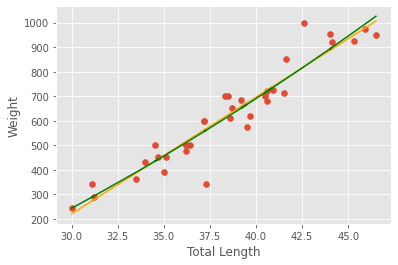

In [36]:
plt.scatter(df_bream.TL,df_bream.Weight)
plt.plot(x,y_head,color= "orange")
plt.plot(x,y_head2,color= "green")
plt.xlabel("Total Length")
plt.ylabel("Weight")
plt.show()

In [37]:
data1.head()

,Species,Weight,SL,FL,TL,BD,BT
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [38]:
x1 = data1.iloc[:,1].values.reshape(-1,1)
y1 = data1.iloc[:,4].values.reshape(-1,1)

from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x1,y1)

x1_ = np.arange(min(x1), max(x1), 0.01).reshape(-1,1)
y1_head = tree_reg.predict(x1_)

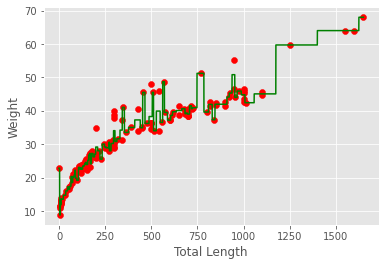

In [39]:
plt.scatter(x1,y1, color = "red")
plt.plot(x1_,y1_head,color = "green")
plt.xlabel("Total Length")
plt.ylabel("Weight")
plt.show()

<ipython-input-40-07712bdcad78>:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



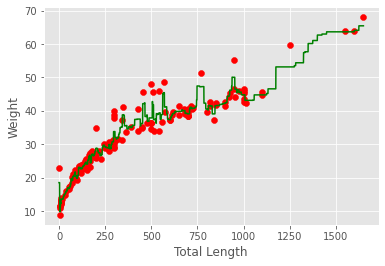

In [40]:
x2 = data1.iloc[:,1].values.reshape(-1,1)
y2 = data1.iloc[:,4].values.reshape(-1,1)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(x2,y2)

x2_ = np.arange(min(x2),max(x2),0.01).reshape(-1,1)
y2_head = rf.predict(x2_)

plt.scatter(x2,y2,color = "red")
plt.plot(x2_,y2_head,color = "green")
plt.xlabel("Total Length")
plt.ylabel("Weight")
plt.show()

In [41]:
# Separate variables
y = df_bream['Weight']
X = df_bream.iloc[:,[4,5]]

# Divide dataset for train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Regression model
ML_reg = LinearRegression()
ML_reg.fit(X_train, y_train)

#Predict weight values from train dataset
y_head = ML_reg.predict(X_train)

In [42]:
from sklearn.metrics import r2_score
r2_score(y_train, y_head)

0.9298294222470389

In [43]:
from sklearn.model_selection import cross_val_score
cross_val_score_train = cross_val_score(ML_reg, X_train, y_train, cv=4, scoring='r2')
print(cross_val_score_train)

[0.85257218 0.93350105 0.84636583 0.96893441]


In [44]:
cross_val_score_train.mean()

0.9003433682022718

In [45]:
y_pred = ML_reg.predict(X_test)
print(r2_score(y_test, y_pred))

0.9424752314985353


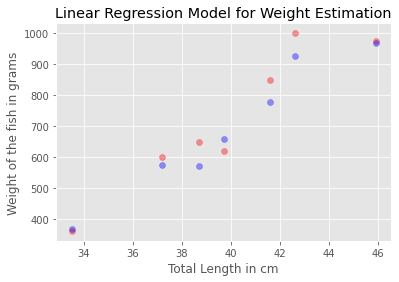

In [46]:
plt.scatter(X_test['TL'], y_test, color='red', alpha=0.4) #Real data
plt.scatter(X_test['TL'], y_pred, color='blue', alpha=0.4) #Predicted data
plt.xlabel('Total Length in cm')
plt.ylabel('Weight of the fish in grams')
plt.title('Linear Regression Model for Weight Estimation');

In [47]:
# Separate variables
yRF = data1.iloc[:,1].values.reshape(-1,1)
XRF = data1.iloc[:,4].values.reshape(-1,1)

# Divide dataset for train and test
from sklearn.model_selection import train_test_split
XRF_train, XRF_test, yRF_train, yRF_test = train_test_split(XRF, yRF, test_size=0.2, random_state=1)

# Regression model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(XRF_train,yRF_train)

#Predict weight values from train dataset
yRF_head = rf.predict(XRF_train)

<ipython-input-47-21f8fa803746>:12: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [48]:
r2_score(yRF_train, yRF_head)

0.9782313211330615

In [49]:
from sklearn.model_selection import cross_val_score
cross_val_score_train = cross_val_score(rf, XRF_train, yRF_train, cv=10, scoring='r2')
print(cross_val_score_train)

/home/nplab/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/home/nplab/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/home/nplab/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/home/nplab/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/home/np

[0.73368066 0.79795904 0.83550951 0.96556808 0.8000427  0.8477348
 0.94868233 0.76598517 0.8875093  0.80234873]


/home/nplab/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [50]:
cross_val_score_train.mean()

0.8385020302274411

In [51]:
yRF_pred = rf.predict(XRF_test).reshape(-1,1)
print(r2_score(yRF_test, yRF_pred))

0.8496283792991637


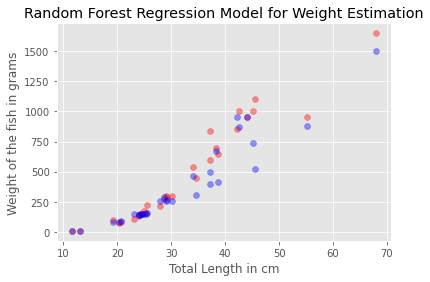

In [52]:
plt.scatter(XRF_test, yRF_test, color='red', alpha=0.4) #Real data
plt.scatter(XRF_test, yRF_pred, color='blue', alpha=0.4) #Predicted data
plt.xlabel('Total Length in cm')
plt.ylabel('Weight of the fish in grams')
plt.title('Random Forest Regression Model for Weight Estimation');

In [53]:
data['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [54]:
data1

,Species,Weight,SL,FL,TL,BD,BT
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
152,Smelt,9.9,11.3,11.8,13.1,2.2139,1.1659
153,Smelt,9.8,11.4,12.0,13.2,2.2044,1.1484
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690


### nrmse 계산 및 시각화 

In [55]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def calculate_nrmse(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    nrmse = rmse / (y_true.max() - y_true.min())
    return nrmse

def linear_regression_nrmse(data, species_index=0, test_size=0.2, random_state=1):
    fish = data['Species'].unique()[species_index]
    df_fish = data[data['Species'] == fish]
    
    y = df_fish['Weight']
    X = df_fish.iloc[:, 2:]
    
    nrmse_results = []
    col_names = []
    for i in range(2, X.shape[1]+2):
        col_name = data.columns[i]
        col_names.append(col_name)
        
        X_subset = df_fish.iloc[:,i].values.reshape(-1,1)
        X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=test_size, random_state=random_state)

        ML_reg = LinearRegression()
        ML_reg.fit(X_train, y_train)
        y_pred = ML_reg.predict(X_test)
        
        nrmse = calculate_nrmse(y_test, y_pred)
        nrmse_results.append(nrmse)
    
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    ML_reg = LinearRegression()
    ML_reg.fit(X_train, y_train)
    y_pred = ML_reg.predict(X_test)

    col_names.append('all')
    nrmse_results.append(calculate_nrmse(y_test, y_pred))
    result_df = pd.DataFrame({'Variables': col_names, 'linear_regression_NRMSE': nrmse_results})
    
    return result_df

In [56]:
linear_regression_nrmse(data1 , 0)

,Variables,linear_regression_NRMSE
0,SL,0.154105
1,FL,0.142477
2,TL,0.138350
3,BD,0.076932
4,BT,0.072074
5,all,0.086676


In [57]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def calculate_nrmse(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    nrmse = rmse / (y_true.max() - y_true.min())
    return nrmse

def ploy_regression_nrmse(data, species_index=0, test_size=0.2, random_state=1):
    fish = data['Species'].unique()[species_index]
    df_fish = data[data['Species'] == fish]
    
    y = df_fish['Weight']
    X = df_fish.iloc[:, 2:]
    
    nrmse_results = []
    col_names = []
    for i in range(2, X.shape[1]+2):
        col_name = data.columns[i]
        col_names.append(col_name)
        
        X_subset = df_fish.iloc[:,i].values.reshape(-1,1)
        X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=test_size, random_state=random_state)

        PL_reg = PolynomialFeatures(degree=2)
        x_train_polynomial = PL_reg.fit_transform(X_train)

        L_reg = LinearRegression()
        L_reg.fit(x_train_polynomial, y_train)

        x_test_polynomial = PL_reg.fit_transform(X_test)
        y_pred = L_reg.predict(x_test_polynomial)
        
        nrmse = calculate_nrmse(y_test, y_pred)
        nrmse_results.append(nrmse)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    PL_reg = PolynomialFeatures(degree=2)
    x_train_polynomial = PL_reg.fit_transform(X_train)

    L_reg = LinearRegression()
    L_reg.fit(x_train_polynomial, y_train)

    x_test_polynomial = PL_reg.fit_transform(X_test)
    y_pred = L_reg.predict(x_test_polynomial)
    
    col_names.append('all')
    nrmse_results.append(calculate_nrmse(y_test, y_pred))
    
    result_df = pd.DataFrame({'Variables': col_names, 'ploy_regression_NRMSE': nrmse_results})
    
    return result_df

In [58]:
ploy_regression_nrmse(data1 , 0)

,Variables,ploy_regression_NRMSE
0,SL,0.156059
1,FL,0.144470
2,TL,0.138690
3,BD,0.079714
4,BT,0.067608
5,all,1.486387


In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

def calculate_nrmse(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    nrmse = rmse / (y_true.max() - y_true.min())
    return nrmse

def decision_tree_regression_nrmse(data, species_index=0, test_size=0.2, random_state=1):
    fish = data['Species'].unique()[species_index]
    df_fish = data[data['Species'] == fish]
    
    y = df_fish['Weight']
    X = df_fish.iloc[:, 2:]
    
    nrmse_results = []
    col_names = []
    for i in range(2, X.shape[1]+2):
        col_name = data.columns[i]
        col_names.append(col_name)
        
        X_subset = df_fish.iloc[:,i].values.reshape(-1,1)
        X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=test_size, random_state=random_state)

        tree_reg = DecisionTreeRegressor()
        tree_reg.fit(X_train, y_train)
        y_pred = tree_reg.predict(X_test)
        
        nrmse = calculate_nrmse(y_test, y_pred)
        nrmse_results.append(nrmse)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    tree_reg = DecisionTreeRegressor()
    tree_reg.fit(X_train, y_train)
    y_pred = tree_reg.predict(X_test)
    
    col_names.append('all')
    nrmse_results.append(calculate_nrmse(y_test, y_pred))
    
    result_df = pd.DataFrame({'Variables': col_names, 'decision_tree_regression_NRMSE': nrmse_results})
    
    return result_df

In [60]:
decision_tree_regression_nrmse(data1 , 0)

,Variables,decision_tree_regression_NRMSE
0,SL,0.197890
1,FL,0.208945
2,TL,0.195924
3,BD,0.149461
4,BT,0.172266
5,all,0.222277


In [61]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

def calculate_nrmse(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    nrmse = rmse / (y_true.max() - y_true.min())
    return nrmse

def random_forest_regression_nrmse(data, species_index=0, test_size=0.2, random_state=1):
    fish = data['Species'].unique()[species_index]
    df_fish = data[data['Species'] == fish]
    
    y = df_fish['Weight']
    X = df_fish.iloc[:, 2:]
    
    nrmse_results = []
    col_names = []
    for i in range(2, X.shape[1]+2):
        col_name = data.columns[i]
        col_names.append(col_name)
        
        X_subset = df_fish.iloc[:,i].values.reshape(-1,1)
        X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=test_size, random_state=random_state)

        rf = RandomForestRegressor(n_estimators=100, random_state=42)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        
        nrmse = calculate_nrmse(y_test, y_pred)
        nrmse_results.append(nrmse)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    
    col_names.append('all')
    nrmse_results.append(calculate_nrmse(y_test, y_pred))
    
    result_df = pd.DataFrame({'Variables': col_names, 'random_forest_regression_NRMSE': nrmse_results})
    
    return result_df

In [62]:
random_forest_regression_nrmse(data1 , 0)

,Variables,random_forest_regression_NRMSE
0,SL,0.181364
1,FL,0.171881
2,TL,0.159905
3,BD,0.138748
4,BT,0.106561
5,all,0.132799


In [63]:
data.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

### 도미(Bream)

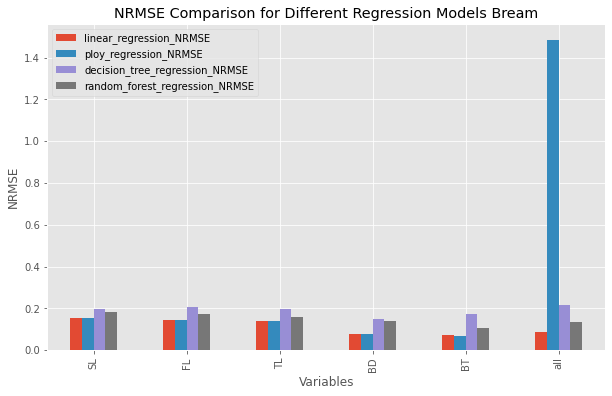

,linear_regression_NRMSE,ploy_regression_NRMSE,decision_tree_regression_NRMSE,random_forest_regression_NRMSE
Variables,,,,
SL,0.154105,0.156059,0.197890,0.181364
FL,0.142477,0.144470,0.208945,0.171881
TL,0.138350,0.138690,0.195924,0.159905
BD,0.076932,0.079714,0.149461,0.138748
BT,0.072074,0.067608,0.172266,0.106561
all,0.086676,1.486387,0.215738,0.132799


In [64]:
linear_result = linear_regression_nrmse(data1 , 0)
poly_result = ploy_regression_nrmse(data1 , 0)
tree_result =decision_tree_regression_nrmse(data1 , 0)
rf_result = random_forest_regression_nrmse(data1 , 0)

merged_result = linear_result.merge(poly_result, on='Variables') \
                            .merge(tree_result, on='Variables') \
                            .merge(rf_result, on='Variables')

linear_result = linear_result.rename(columns={'NRMSE': 'Linear'})
poly_result = poly_result.rename(columns={'NRMSE': 'Polynomial'})
tree_result = tree_result.rename(columns={'NRMSE': 'Decision Tree'})
rf_result = rf_result.rename(columns={'NRMSE': 'Random Forest'})

linear_result.set_index('Variables', inplace=True)
poly_result.set_index('Variables', inplace=True)
tree_result.set_index('Variables', inplace=True)
rf_result.set_index('Variables', inplace=True)

# 결과 데이터프레임을 병합합니다
merged_result = pd.concat([linear_result, poly_result, tree_result, rf_result], axis=1)

# 시각화를 위한 그래프 그리기
merged_result.plot(kind='bar', figsize=(10, 6))
plt.title(f'NRMSE Comparison for Different Regression Models {data1["Species"].unique()[0]}')
plt.ylabel('NRMSE')
plt.xlabel('Variables')
plt.show()
merged_result

### 잉어과 민물고기(loach)

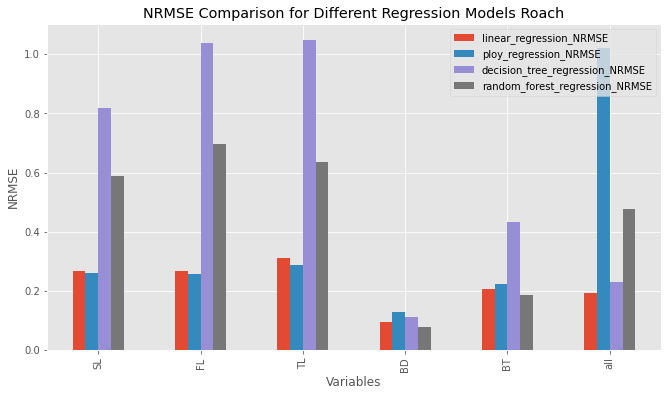

,linear_regression_NRMSE,ploy_regression_NRMSE,decision_tree_regression_NRMSE,random_forest_regression_NRMSE
Variables,,,,
SL,0.268608,0.260796,0.817679,0.589126
FL,0.267893,0.256665,1.037773,0.696546
TL,0.312682,0.288906,1.049257,0.634519
BD,0.096453,0.127642,0.113465,0.078286
BT,0.206442,0.224354,0.432116,0.186706
all,0.193228,1.020940,0.231117,0.476332


In [65]:
linear_result = linear_regression_nrmse(data1 , 1)
poly_result = ploy_regression_nrmse(data1 , 1)
tree_result =decision_tree_regression_nrmse(data1 , 1)
rf_result = random_forest_regression_nrmse(data1 , 1)

merged_result = linear_result.merge(poly_result, on='Variables') \
                            .merge(tree_result, on='Variables') \
                            .merge(rf_result, on='Variables')

linear_result = linear_result.rename(columns={'NRMSE': 'Linear'})
poly_result = poly_result.rename(columns={'NRMSE': 'Polynomial'})
tree_result = tree_result.rename(columns={'NRMSE': 'Decision Tree'})
rf_result = rf_result.rename(columns={'NRMSE': 'Random Forest'})

linear_result.set_index('Variables', inplace=True)
poly_result.set_index('Variables', inplace=True)
tree_result.set_index('Variables', inplace=True)
rf_result.set_index('Variables', inplace=True)

# 결과 데이터프레임을 병합합니다
merged_result = pd.concat([linear_result, poly_result, tree_result, rf_result], axis=1)

# 시각화를 위한 그래프 그리기
merged_result.plot(kind='bar', figsize=(11, 6))
plt.title(f'NRMSE Comparison for Different Regression Models {data1["Species"].unique()[1]}')
plt.ylabel('NRMSE')
plt.xlabel('Variables')
plt.show()
merged_result

### 송어(Whitefish)

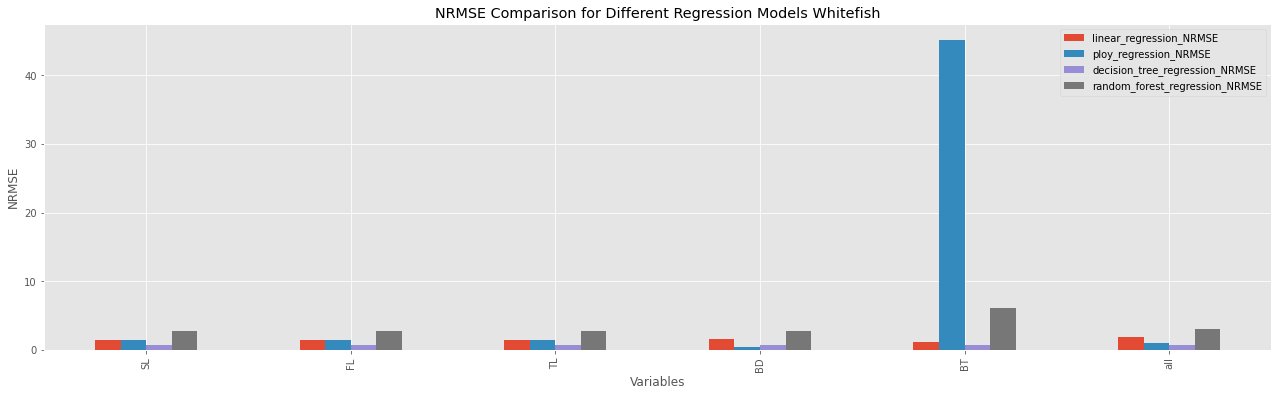

,linear_regression_NRMSE,ploy_regression_NRMSE,decision_tree_regression_NRMSE,random_forest_regression_NRMSE
Variables,,,,
SL,1.544631,1.543607,0.707107,2.737712
FL,1.493798,1.493372,0.707107,2.737712
TL,1.512244,1.510389,0.707107,2.737712
BD,1.681699,0.482372,0.707107,2.737712
BT,1.232718,45.214246,0.707107,6.128763
all,1.911548,1.063860,0.707107,3.098936


In [66]:
linear_result = linear_regression_nrmse(data1 , 2)
poly_result = ploy_regression_nrmse(data1 , 2)
tree_result =decision_tree_regression_nrmse(data1 , 2)
rf_result = random_forest_regression_nrmse(data1 , 2)

merged_result = linear_result.merge(poly_result, on='Variables') \
                            .merge(tree_result, on='Variables') \
                            .merge(rf_result, on='Variables')

linear_result = linear_result.rename(columns={'NRMSE': 'Linear'})
poly_result = poly_result.rename(columns={'NRMSE': 'Polynomial'})
tree_result = tree_result.rename(columns={'NRMSE': 'Decision Tree'})
rf_result = rf_result.rename(columns={'NRMSE': 'Random Forest'})

linear_result.set_index('Variables', inplace=True)
poly_result.set_index('Variables', inplace=True)
tree_result.set_index('Variables', inplace=True)
rf_result.set_index('Variables', inplace=True)

# 결과 데이터프레임을 병합합니다
merged_result = pd.concat([linear_result, poly_result, tree_result, rf_result], axis=1)

# 시각화를 위한 그래프 그리기
merged_result.plot(kind='bar', figsize=(22, 6))
plt.title(f'NRMSE Comparison for Different Regression Models {data1["Species"].unique()[2]}')
plt.ylabel('NRMSE')
plt.xlabel('Variables')
plt.show()
merged_result

### 조기과(Parkki) 

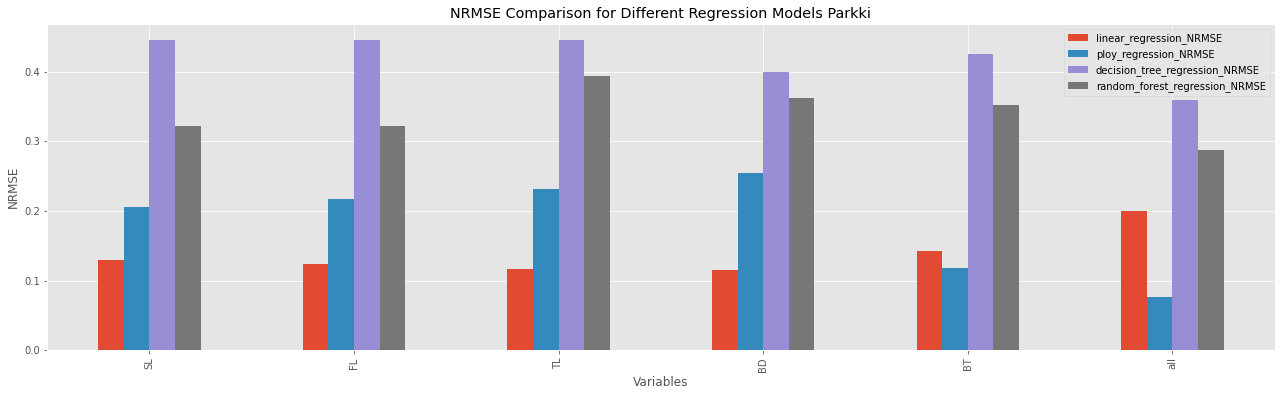

,linear_regression_NRMSE,ploy_regression_NRMSE,decision_tree_regression_NRMSE,random_forest_regression_NRMSE
Variables,,,,
SL,0.130104,0.206225,0.446177,0.321764
FL,0.124282,0.217721,0.446177,0.321764
TL,0.117217,0.231588,0.446177,0.393530
BD,0.115016,0.253887,0.399653,0.362661
BT,0.142728,0.118049,0.424918,0.351669
all,0.200277,0.075951,0.360041,0.286968


In [67]:
linear_result = linear_regression_nrmse(data1 , 3)
poly_result = ploy_regression_nrmse(data1 , 3)
tree_result =decision_tree_regression_nrmse(data1 , 3)
rf_result = random_forest_regression_nrmse(data1 , 3)

merged_result = linear_result.merge(poly_result, on='Variables') \
                            .merge(tree_result, on='Variables') \
                            .merge(rf_result, on='Variables')

linear_result = linear_result.rename(columns={'NRMSE': 'Linear'})
poly_result = poly_result.rename(columns={'NRMSE': 'Polynomial'})
tree_result = tree_result.rename(columns={'NRMSE': 'Decision Tree'})
rf_result = rf_result.rename(columns={'NRMSE': 'Random Forest'})

linear_result.set_index('Variables', inplace=True)
poly_result.set_index('Variables', inplace=True)
tree_result.set_index('Variables', inplace=True)
rf_result.set_index('Variables', inplace=True)

# 결과 데이터프레임을 병합합니다
merged_result = pd.concat([linear_result, poly_result, tree_result, rf_result], axis=1)

# 시각화를 위한 그래프 그리기
merged_result.plot(kind='bar', figsize=(22, 6))
plt.title(f'NRMSE Comparison for Different Regression Models {data1["Species"].unique()[3]}')
plt.ylabel('NRMSE')
plt.xlabel('Variables')
plt.show()
merged_result

### 농어(Perch) 

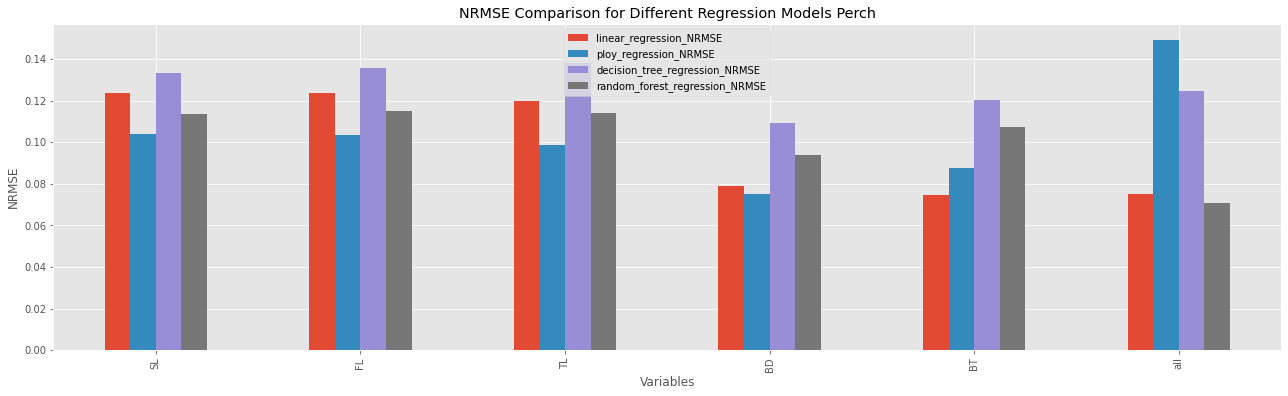

,linear_regression_NRMSE,ploy_regression_NRMSE,decision_tree_regression_NRMSE,random_forest_regression_NRMSE
Variables,,,,
SL,0.123546,0.104079,0.133387,0.113522
FL,0.123717,0.103433,0.135635,0.115018
TL,0.119850,0.098833,0.138133,0.113964
BD,0.078937,0.075153,0.109183,0.093821
BT,0.074594,0.087335,0.120197,0.107377
all,0.074882,0.149305,0.124691,0.070781


In [68]:
linear_result = linear_regression_nrmse(data1 , 4)
poly_result = ploy_regression_nrmse(data1 , 4)
tree_result =decision_tree_regression_nrmse(data1 , 4)
rf_result = random_forest_regression_nrmse(data1 , 4)

merged_result = linear_result.merge(poly_result, on='Variables') \
                            .merge(tree_result, on='Variables') \
                            .merge(rf_result, on='Variables')

linear_result = linear_result.rename(columns={'NRMSE': 'Linear'})
poly_result = poly_result.rename(columns={'NRMSE': 'Polynomial'})
tree_result = tree_result.rename(columns={'NRMSE': 'Decision Tree'})
rf_result = rf_result.rename(columns={'NRMSE': 'Random Forest'})

linear_result.set_index('Variables', inplace=True)
poly_result.set_index('Variables', inplace=True)
tree_result.set_index('Variables', inplace=True)
rf_result.set_index('Variables', inplace=True)

# 결과 데이터프레임을 병합합니다
merged_result = pd.concat([linear_result, poly_result, tree_result, rf_result], axis=1)

# 시각화를 위한 그래프 그리기
merged_result.plot(kind='bar', figsize=(22, 6))
plt.title(f'NRMSE Comparison for Different Regression Models {data1["Species"].unique()[4]}')
plt.ylabel('NRMSE')
plt.xlabel('Variables')
plt.show()
merged_result

### 강꼬치고기(Pike)

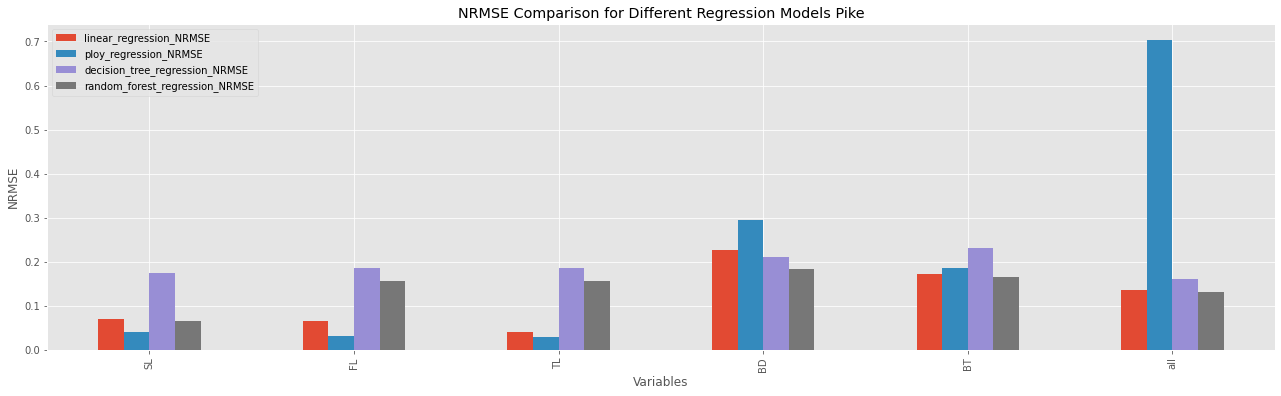

,linear_regression_NRMSE,ploy_regression_NRMSE,decision_tree_regression_NRMSE,random_forest_regression_NRMSE
Variables,,,,
SL,0.070213,0.040260,0.174413,0.067271
FL,0.065124,0.032973,0.186409,0.155919
TL,0.041524,0.029251,0.186409,0.157193
BD,0.226673,0.295547,0.211920,0.184901
BT,0.173138,0.186008,0.231077,0.166101
all,0.136653,0.704329,0.162171,0.130804


In [69]:
linear_result = linear_regression_nrmse(data1 , 5)
poly_result = ploy_regression_nrmse(data1 , 5)
tree_result =decision_tree_regression_nrmse(data1 , 5)
rf_result = random_forest_regression_nrmse(data1 , 5)

merged_result = linear_result.merge(poly_result, on='Variables') \
                            .merge(tree_result, on='Variables') \
                            .merge(rf_result, on='Variables')

linear_result = linear_result.rename(columns={'NRMSE': 'Linear'})
poly_result = poly_result.rename(columns={'NRMSE': 'Polynomial'})
tree_result = tree_result.rename(columns={'NRMSE': 'Decision Tree'})
rf_result = rf_result.rename(columns={'NRMSE': 'Random Forest'})

linear_result.set_index('Variables', inplace=True)
poly_result.set_index('Variables', inplace=True)
tree_result.set_index('Variables', inplace=True)
rf_result.set_index('Variables', inplace=True)

# 결과 데이터프레임을 병합합니다
merged_result = pd.concat([linear_result, poly_result, tree_result, rf_result], axis=1)

# 시각화를 위한 그래프 그리기
merged_result.plot(kind='bar', figsize=(22, 6))
plt.title(f'NRMSE Comparison for Different Regression Models {data1["Species"].unique()[5]}')
plt.ylabel('NRMSE')
plt.xlabel('Variables')
plt.show()
merged_result

### 바다빙어과(Smelt)

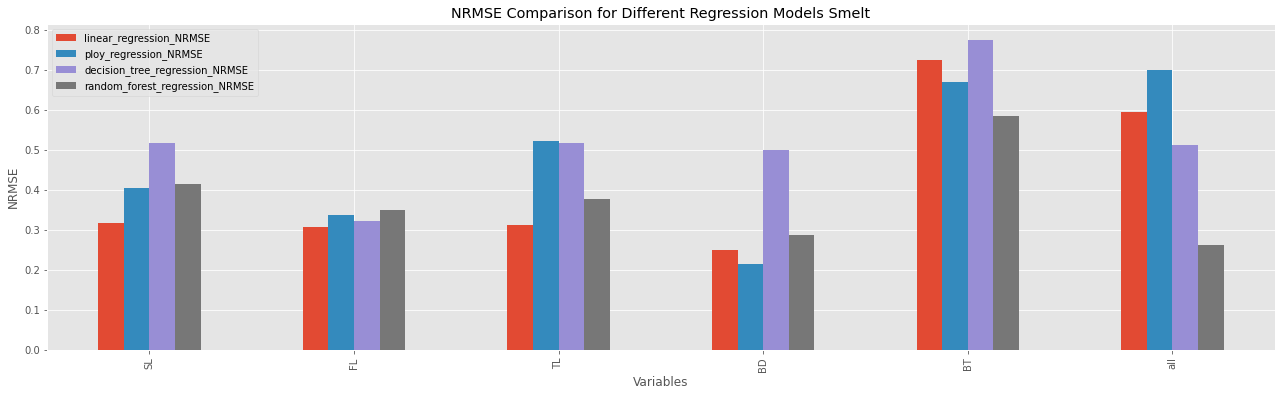

,linear_regression_NRMSE,ploy_regression_NRMSE,decision_tree_regression_NRMSE,random_forest_regression_NRMSE
Variables,,,,
SL,0.316231,0.404202,0.517549,0.415664
FL,0.306879,0.336584,0.323407,0.348951
TL,0.311743,0.520802,0.517549,0.377357
BD,0.250967,0.214367,0.499149,0.287594
BT,0.723235,0.670238,0.775091,0.585082
all,0.595500,0.699332,0.510935,0.263538


In [70]:
linear_result = linear_regression_nrmse(data1 , 6)
poly_result = ploy_regression_nrmse(data1 , 6)
tree_result =decision_tree_regression_nrmse(data1 , 6)
rf_result = random_forest_regression_nrmse(data1 , 6)

merged_result = linear_result.merge(poly_result, on='Variables') \
                            .merge(tree_result, on='Variables') \
                            .merge(rf_result, on='Variables')

linear_result = linear_result.rename(columns={'NRMSE': 'Linear'})
poly_result = poly_result.rename(columns={'NRMSE': 'Polynomial'})
tree_result = tree_result.rename(columns={'NRMSE': 'Decision Tree'})
rf_result = rf_result.rename(columns={'NRMSE': 'Random Forest'})

linear_result.set_index('Variables', inplace=True)
poly_result.set_index('Variables', inplace=True)
tree_result.set_index('Variables', inplace=True)
rf_result.set_index('Variables', inplace=True)

# 결과 데이터프레임을 병합합니다
merged_result = pd.concat([linear_result, poly_result, tree_result, rf_result], axis=1)

# 시각화를 위한 그래프 그리기
merged_result.plot(kind='bar', figsize=(22, 6))
plt.title(f'NRMSE Comparison for Different Regression Models {data1["Species"].unique()[6]}')
plt.ylabel('NRMSE')
plt.xlabel('Variables')
plt.show()
merged_result

In [71]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display

species_dropdown = widgets.Dropdown(
    options=[(species, i) for i, species in enumerate(data1['Species'].unique())],
    description='Species:',
    disabled=False,
)
display(species_dropdown)

output = widgets.Output()
display(output)

def update_graph(selected_species):
    linear_result = linear_regression_nrmse(data1, selected_species)
    poly_result = ploy_regression_nrmse(data1, selected_species)
    tree_result = decision_tree_regression_nrmse(data1, selected_species)
    rf_result = random_forest_regression_nrmse(data1, selected_species)

    merged_result = linear_result.merge(poly_result, on='Variables') \
                                .merge(tree_result, on='Variables') \
                                .merge(rf_result, on='Variables')

    fig = make_subplots(rows=1, cols=1)
    for model in ['linear_regression_NRMSE', 'ploy_regression_NRMSE', 'decision_tree_regression_NRMSE', 'random_forest_regression_NRMSE']:
        fig.add_trace(go.Bar(x=merged_result['Variables'], y=merged_result[model], name=model))

    fig.update_layout(title_text=f'NRMSE Comparison for Different Regression Models {data["Species"].unique()[selected_species]}')
    return fig

def dropdown_event_handler(change):
    with output:
        output.clear_output(wait=True)
        selected_species = change.new
        fig = update_graph(selected_species)
        fig.show()

species_dropdown.observe(dropdown_event_handler, names='value')


Dropdown(description='Species:', options=(('Bream', 0), ('Roach', 1), ('Whitefish', 2), ('Parkki', 3), ('Perch…

Output()